## Weather Prediction with Deep Learning (30 minutes)
Denis Akhiyarov
    * Senior Consultant at Wood
    * Python.NET (Python for .NET) core developer
    * Faculty at North American University
    
https://notebooks.azure.com/denfromufa/libraries/pmlc


## Economics of weather forecasting?

<table>
<tr>
   <td>
       <!---->
     <ul>
        <h3>1. Insurance and reinsurance</h3>
        <h3>2. Transportation (air, taxi, boats)</h3>
        <h3>3. Agriculture and fishing</h3>
        <h3>4. Input for energy industry</h3>
        <h3>5. Climate change and extreme events</h3>     
     </ul> 
 </td>
 <td> 
   <p>
     <img src="https://rstorage.filemobile.com/storage/23092306/1085" 
          alt>
     <!-- width="600" height="400" --> 
   </p>
   <p>
     <em>https://www.theweathernetwork.com</em>
   </p>
  </td>
</tr>
</table>


## Models of weather predictions?
Unified model - UK Met Office
![](https://www.metoffice.gov.uk/binaries/content/gallery/mohippo/images/research/graphics/umsystems_13022018_1920.png)

## Yandex Weather

https://yandex.com/company/blog/winter-is-coming-yandex-weather-nowcasting-helps-users-plan-for-precipitation

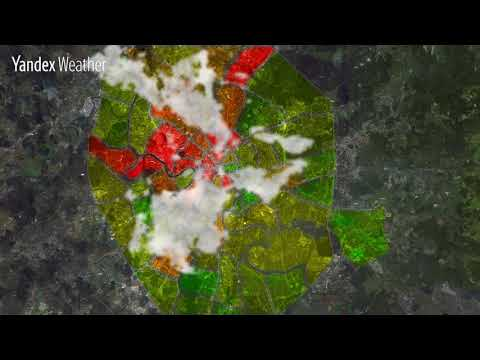

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('aR5p7_g8qXQ', width=800, height=600)

## Deep Learning at 15 PFlops Enables Training for Extreme Weather Identification at Scale
National Energy Research Scientific Computing Center

![](https://6lli539m39y3hpkelqsm3c2fg-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Intel-NERSC-feature-graphic-weather-675x380.png)

## Package imports

In [0]:
import pandas as pd
import numpy as np
from numpy import exp
from IPython.display import HTML, Latex, Math, display
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sympy.printing import latex
from sympy.core.sympify import sympify
%matplotlib inline
pd.options.display.max_columns=50
pd.options.display.max_colwidth=100
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['figure.figsize'] = (3, 2)
fontsize=3
matplotlib.rcParams['figure.titlesize'] = fontsize
matplotlib.rcParams['axes.labelsize'] = fontsize
matplotlib.rcParams['font.size'] = fontsize
matplotlib.rcParams['axes.titlesize'] = fontsize
matplotlib.rcParams['legend.fontsize'] = fontsize
matplotlib.rcParams['xtick.labelsize'] = fontsize
matplotlib.rcParams['ytick.labelsize'] = fontsize
matplotlib.rcParams['lines.markersize'] = 2

## How to get weather data?!

Even Google Datasets does not explain well, multiple commercial offerings online


https://www.kaggle.com/selfishgene/historical-hourly-weather-data

Historic data of weather in Houston requested and retrieved from Department of Commerce > NOAA > NESDIS > NCEI

https://www.ncdc.noaa.gov/

https://www7.ncdc.noaa.gov/CDO/cdopoemain.cmd?datasetabbv=DS3505

![alt text](https://raw.githubusercontent.com/denfromufa/deepweather/master/Capture.PNG)

## Data Exploration and Cleaning

Let's read the head of the table and look at the data using pandas

In [4]:
dftxtown=pd.read_csv("https://raw.githubusercontent.com/denfromufa/deepweather/master/data/8004287785567dat.txt", 
                    delim_whitespace=True)
dftxtown.head()

,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW.1,MW.2,MW.3,AW,AW.1,AW.2,AW.3,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
0,720648,230,201511010015,***,0,***,722,SCT,*,*,*,10.0,**,**,**,**,**,**,**,**,*,68,64,******,29.86,******,***,***,*****,*****,*****,*****,**
1,720648,230,201511010035,010,6,***,50,***,*,*,*,10.0,**,**,**,**,**,**,**,**,*,68,66,******,29.87,******,***,***,*****,*****,*****,*****,**
2,720648,230,201511010055,010,7,***,50,***,*,*,*,10.0,**,**,**,**,**,**,**,**,*,68,64,******,29.88,******,***,***,*****,*****,*****,*****,**
3,720648,230,201511010115,350,10,***,28,***,*,*,*,10.0,**,**,**,**,**,**,**,**,*,70,63,******,29.89,******,***,***,*****,*****,*****,*****,**
4,720648,230,201511010135,340,11,***,60,***,*,*,*,10.0,**,**,**,**,**,**,**,**,*,68,63,******,29.91,******,***,***,*****,*****,*****,*****,**


In [5]:
dftxtown.shape

(549546, 33)

In [6]:
dftxtown.USAF.value_counts()

999999    316540
720648     77469
722530     42688
722590     41489
722510     38613
722580     32747
Name: USAF, dtype: int64

In [7]:
dftxtown.WBAN.value_counts()

23907    316540
230       77469
12921     42688
3927      41489
12924     38613
13960     32747
Name: WBAN, dtype: int64

In [8]:
dfhtown=pd.read_csv("https://raw.githubusercontent.com/denfromufa/deepweather/master/data/8115087791588dat.txt", 
                    delim_whitespace=True)
dfhtown.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW.1,MW.2,MW.3,AW,AW.1,AW.2,AW.3,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
0,720637,223,201511010015,330,6,***,14,***,*,*,*,10.0,**,**,**,**,61,**,**,**,*,70,68,******,29.8,******,***,***,*****,*****,*****,*****,**
1,720637,223,201511010035,010,5,***,14,***,*,*,*,10.0,**,**,**,**,61,**,**,**,*,70,68,******,29.82,******,***,***,*****,*****,*****,*****,**
2,720637,223,201511010055,350,8,***,19,***,*,*,*,10.0,**,**,**,**,61,**,**,**,*,69,68,******,29.8,******,***,***,0.01,*****,*****,*****,**
3,720637,223,201511010115,340,6,***,34,***,*,*,*,10.0,**,**,**,**,**,**,**,**,*,69,68,******,29.82,******,***,***,0.01,*****,*****,*****,**
4,720637,223,201511010135,340,5,***,19,***,*,*,*,10.0,**,**,**,**,**,**,**,**,*,69,68,******,29.83,******,***,***,0.01,*****,*****,*****,**


In [9]:
dfhtown.shape

(78216, 33)

In [10]:
dftxtown = pd.concat([dfhtown,dftxtown])

dftxtown.shape

(627762, 33)

In [11]:
dftxtown['USAFWBAN'] = dftxtown['USAF'].astype(str) + dftxtown['WBAN'].astype(str)
del dftxtown['USAF']
del dftxtown['WBAN']
dftxtown.head()

,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW.1,MW.2,MW.3,AW,AW.1,AW.2,AW.3,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD,USAFWBAN
0,201511010015,330,6,***,14,***,*,*,*,10.0,**,**,**,**,61,**,**,**,*,70,68,******,29.8,******,***,***,*****,*****,*****,*****,**,720637223
1,201511010035,010,5,***,14,***,*,*,*,10.0,**,**,**,**,61,**,**,**,*,70,68,******,29.82,******,***,***,*****,*****,*****,*****,**,720637223
2,201511010055,350,8,***,19,***,*,*,*,10.0,**,**,**,**,61,**,**,**,*,69,68,******,29.8,******,***,***,0.01,*****,*****,*****,**,720637223
3,201511010115,340,6,***,34,***,*,*,*,10.0,**,**,**,**,**,**,**,**,*,69,68,******,29.82,******,***,***,0.01,*****,*****,*****,**,720637223
4,201511010135,340,5,***,19,***,*,*,*,10.0,**,**,**,**,**,**,**,**,*,69,68,******,29.83,******,***,***,0.01,*****,*****,*****,**,720637223


In [12]:
dftxtown.USAFWBAN.value_counts()

99999923907    316540
720637223       78216
720648230       77469
72253012921     42688
7225903927      41489
72251012924     38613
72258013960     32747
Name: USAFWBAN, dtype: int64

In [0]:
dftxtown = dftxtown[dftxtown['USAFWBAN'].astype(int).isin(
    [99999923907, 72251012924, 72253012921, 7225903927, 720637223])]

In [14]:
dftxtown = dftxtown.pivot(index='YR--MODAHRMN', columns='USAFWBAN')

dftxtown.head()

DIR                                                 \
USAFWBAN     720637223 72251012924 72253012921 7225903927 99999923907   
YR--MODAHRMN                                                            
201511010000      None         330         070        320         ***   
201511010005      None        None        None       None         ***   
201511010010      None        None        None       None         ***   
201511010015       330        None        None       None         ***   
201511010020      None        None        None       None         ***   

                   SPD                                                 \
USAFWBAN     720637223 72251012924 72253012921 7225903927 99999923907   
YR--MODAHRMN                                                            
201511010000      None          15           5         10           6   
201511010005      None        None        None       None         ***   
201511010010      None        None        None       None         ***   
201511010015         6        None        None       None         ***   
201511010020      None        None        None       None         ***   

                   GUS                                                 \
USAFWBAN     720637223 72251012924 72253012921 7225903927 99999923907   
YR--MODAHRMN                                                            
201511010000      None         ***         ***        ***         ***   
201511010005      None        None        None       None         ***   
201511010010      None        None        None       None         ***   
201511010015       ***        None        None       None         ***   
201511010020      None        None        None       None         ***   

                   CLG                                                 \
USAFWBAN     720637223 72251012924 72253012921 7225903927 99999923907   
YR--MODAHRMN                                                            
201511010000      None         ***         ***        ***         ***   
201511010005      None        None        None       None         ***   
201511010010      None        None        None       None         ***   
201511010015        14        None        None       None         ***   
201511010020      None        None        None       None         ***   

                   SKC                                                 \
USAFWBAN     720637223 72251012924 72253012921 7225903927 99999923907   
YR--MODAHRMN                                                            
201511010000      None         OVC         OVC        OVC         ***   
201511010005      None        None        None       None         ***   
201511010010      None        None        None       None         ***   
201511010015       ***        None        None       None         ***   
201511010020      None        None        None       None         ***   

                 ...         PCP01                                     \
USAFWBAN         ...     720637223 72251012924 72253012921 7225903927   
YR--MODAHRMN     ...                                                    
201511010000     ...          None       *****       *****      *****   
201511010005     ...          None        None        None       None   
201511010010     ...          None        None        None       None   
201511010015     ...         *****        None        None       None   
201511010020     ...          None        None        None       None   

                             PCP06                                      \
USAFWBAN     99999923907 720637223 72251012924 72253012921  7225903927   
YR--MODAHRMN                                                             
201511010000        0.00      None       *****       *****  0.00T*****   
201511010005       *****      None        None        None        None   
201511010010       *****      None        None        None        None   
201511010015       *****     *****        None        None       

In [0]:
dftxtown.index = pd.to_datetime(dftxtown.index, format='%Y%m%d%H%M')

The data is messy, the names of columns not clear, so let's look at html version. Again using pandas!

In [16]:
import sys
!pip install lxml html5lib

    100% |████████████████████████████████| 5.8MB 5.6MB/s 
    100% |████████████████████████████████| 122kB 29.6MB/s 


In [0]:
def pd2html(df, header=False, index=False):
    return HTML(df.to_html(index=False, header=False))

In [18]:
dfheaders = []
for _city in [99999923907, 72251012924, 72253012921, 72259003927]:
  dfheaders.append(pd.read_html(
      "https://raw.githubusercontent.com/denfromufa/deepweather/master/data/{}-2018-11_8004287785567dat.html".format(_city)))
  display(pd2html(dfheaders[-1][0]))

AWS ID 999999,WBAN ID 23907,Name AUSTIN 33 NW,Country UNITED STATES,State TEXAS,Latitude +30.622,Longitude -098.085,Elevation +0414.8 (meters)


AWS ID 722510,WBAN ID 12924,Name CORPUS CHRISTI INTERNATIONAL AIRPORT,Country UNITED STATES,State TEXAS,Latitude +27.774,Longitude -097.512,Elevation +0013.4 (meters)


AWS ID 722530,WBAN ID 12921,Name SAN ANTONIO INTERNATIONAL AIRPORT,Country UNITED STATES,State TEXAS,Latitude +29.544,Longitude -098.484,Elevation +0240.5 (meters)


AWS ID 722590,WBAN ID 03927,Name DALLAS/FT WORTH INTERNATIONAL AP,Country UNITED STATES,State TEXAS,Latitude +32.898,Longitude -097.019,Elevation +0170.7 (meters)


In [19]:
for dfheader in dfheaders:
  display(pd2html(dfheader[1][:2]))

USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW,MW,MW,AW,AW,AW,AW,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
NaN,NaN,GMT,NaN,MPH,MPH,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F,Mb,inches,Mb,F,F,inches,inches,inches,inches,inches


USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW,MW,MW,AW,AW,AW,AW,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
NaN,NaN,GMT,NaN,MPH,MPH,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F,Mb,inches,Mb,F,F,inches,inches,inches,inches,inches


USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW,MW,MW,AW,AW,AW,AW,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
NaN,NaN,GMT,NaN,MPH,MPH,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F,Mb,inches,Mb,F,F,inches,inches,inches,inches,inches


USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW,MW,MW,AW,AW,AW,AW,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
NaN,NaN,GMT,NaN,MPH,MPH,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F,Mb,inches,Mb,F,F,inches,inches,inches,inches,inches


Let's set the index of dataframe (table) to dates

In [0]:
# dfhtown.set_index(dfhtown.columns[2], inplace=True)
# dfhtown.head(3)

In [0]:
#dfhtown.index=pd.to_datetime(dfhtown.index, format="%Y%m%d%H%M")
#dfhtown.index.name='datetime'
#dfhtown.replace(to_replace='\*+', value=np.nan, regex=True, inplace=True)
#dfhtown.dropna(axis=1, inplace=True, how='all')
#dfhtown.head()

Let's look at subset of columns with physical units from HTML version of the table

In [22]:
dfunits=dfheader[1][:2]
dfunits

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,H,VSB,MW,MW,MW,MW,AW,AW,AW,AW,W,TEMP,DEWP,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
1,NaN,NaN,GMT,NaN,MPH,MPH,NaN,NaN,NaN,NaN,NaN,Miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F,Mb,inches,Mb,F,F,inches,inches,inches,inches,inches


In [23]:
dfunits.rename(columns=dfunits.iloc[0]).iloc[1].loc[dfhtown.columns].dropna().to_frame()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,1
YR--MODAHRMN,GMT
SPD,MPH
GUS,MPH
VSB,Miles
TEMP,F
DEWP,F
SLP,Mb
ALT,inches
STP,Mb
MAX,F


* So SPD and GUS are some velocity measurements for wind
* VSB??
* TEMP - temperature
* DEWP - temperature dewpoint (used for humidity)
* ALT - perhaps the pressure in inches of liquid, such as mercury

The types of columns are very generic (object), so let's improve this!

In [24]:
dfhtown.dtypes

USAF             int64
WBAN             int64
YR--MODAHRMN     int64
DIR             object
SPD             object
GUS             object
CLG             object
SKC             object
L               object
M               object
H               object
VSB             object
MW              object
MW.1            object
MW.2            object
MW.3            object
AW              object
AW.1            object
AW.2            object
AW.3            object
W               object
TEMP            object
DEWP            object
SLP             object
ALT             object
STP             object
MAX             object
MIN             object
PCP01           object
PCP06           object
PCP24           object
PCPXX           object
SD              object
dtype: object

In [25]:
dfhtown = dfhtown[['DIR','SPD','VSB','TEMP','DEWP','ALT']].astype('float64',raise_on_error=False)
dfhtown.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: the raise_on_error=False keyword is deprecated, use errors='ignore' instead
  """Entry point for launching an IPython kernel.


,DIR,SPD,VSB,TEMP,DEWP,ALT
0,330,6,10.0,70,68,29.8
1,010,5,10.0,70,68,29.82
2,350,8,10.0,69,68,29.8
3,340,6,10.0,69,68,29.82
4,340,5,10.0,69,68,29.83


In [26]:
dfhtown.dtypes

DIR     object
SPD     object
VSB     object
TEMP    object
DEWP    object
ALT     object
dtype: object

In [27]:
dftxtown = dftxtown.filter(regex="|".join(
    ['DIR','SPD','VSB','TEMP','DEWP','ALT'])).replace(
    '^\*+$', np.nan, regex=True).astype(
    float, errors='ignore').dropna(
    how='all', axis='columns').dropna(
    axis='rows', how='all').resample('60min').median().dropna()

dftxtown.head()

DIR                                          SPD  \
USAFWBAN            720637223 72251012924 72253012921 7225903927 720637223   
YR--MODAHRMN                                                                 
2015-11-01 00:00:00     330.0       335.0       205.0      330.0       6.0   
2015-11-01 01:00:00     340.0       340.0       335.0      330.0       6.0   
2015-11-01 02:00:00     340.0        10.0        60.0      325.0       6.0   
2015-11-01 03:00:00     330.0       330.0       185.0      330.0       3.0   
2015-11-01 04:00:00     320.0       350.0       320.0      340.0       6.0   

                                                                         VSB  \
USAFWBAN            72251012924 72253012921 7225903927 99999923907 720637223   
YR--MODAHRMN                                                                   
2015-11-01 00:00:00        15.5        10.0       12.0         6.0      10.0   
2015-11-01 01:00:00        14.0         9.5       10.0         5.0      10.0   
2015-11-01 02:00:00         9.0         7.0       10.5         2.0      10.0   
2015-11-01 03:00:00        10.0         6.5       10.0         2.0      10.0   
2015-11-01 04:00:00         8.0         8.0        6.0         6.0      10.0   

                                                            TEMP              \
USAFWBAN            72251012924 72253012921 7225903927 720637223 72251012924   
YR--MODAHRMN                                                                   
2015-11-01 00:00:00        10.0        10.0       10.0      70.0        73.5   
2015-11-01 01:00:00        10.0         4.5       10.0      69.0        72.0   
2015-11-01 02:00:00        10.0        10.0       10.0      69.0        69.0   
2015-11-01 03:00:00        10.0        10.0       10.0      69.0        69.0   
2015-11-01 04:00:00        10.0        10.0       10.0      69.0        68.0   

                                                            DEWP              \
USAFWBAN            72253012921 7225903927 99999923907 720637223 72251012924   
YR--MODAHRMN                                                                   
2015-11-01 00:00:00        75.0       61.5        65.0      68.0        65.0   
2015-11-01 01:00:00        69.0       61.0        63.0      68.0        68.0   
2015-11-01 02:00:00        67.0       60.5        63.0      67.0        68.0   
2015-11-01 03:00:00        67.0       60.0        63.0      67.0        68.0   
2015-11-01 04:00:00        66.0       60.0        62.0      66.0        67.0   

                                                 ALT                          \
USAFWBAN            72253012921 7225903927 720637223 72251012924 72253012921   
YR--MODAHRMN                                                                   
2015-11-01 00:00:00        61.5       55.5     29.80       29.82      29.880   
2015-11-01 01:00:00        63.0       55.0     29.83       29.85      29.905   
2015-11-01 02:00:00        62.0       54.0     29.85       29.85      29.900   
2015-11-01 03:00:00        62.0       54.0     29.88       29.89      29.930   
2015-11-01 04:00:00        61.0       53.0     29.89       29.92      29.940   

                                
USAFWBAN            7225903927  
YR--MODAHRMN                    
2015-11-01 00:00:00     29.870  
2015-11-01 01:00:00     29.900  
2015-11-01 02:00:00     29.920  
2015-11-01 03:00:00     29.935  
2015-11-01 04:00:00     29.950

The relative humidity (RH) is not given in table, so let's calculate using measured temperature and dewpoint temperature

In [28]:
dftxtown.describe()

DIR                                            \
USAFWBAN     720637223   72251012924   72253012921    7225903927   
count     17417.000000  17417.000000  17417.000000  17417.000000   
mean        176.411839    159.598668    188.619165    197.955733   
std         128.549854    130.006679    180.261087    150.182745   
min          10.000000     10.000000     10.000000     10.000000   
25%         105.000000    100.000000    100.000000    130.000000   
50%         150.000000    140.000000    150.000000    170.000000   
75%         220.000000    170.000000    200.000000    220.000000   
max         990.000000    990.000000    990.000000    990.000000   

                   SPD                                            \
USAFWBAN     720637223   72251012924   72253012921    7225903927   
count     17417.000000  17417.000000  17417.000000  17417.000000   
mean          6.364443     13.489436      9.861917     11.759689   
std           3.843356      5.929081      4.549815      5.508809   
min           0.000000      0.000000      0.000000      0.000000   
25%           3.000000      9.000000      6.500000      8.000000   
50%           6.000000     13.000000      9.000000     11.000000   
75%           9.000000     17.000000     13.000000     15.000000   
max          26.000000     41.000000     31.000000     36.000000   

                                 VSB                              \
USAFWBAN   99999923907     720637223   72251012924   72253012921   
count     17417.000000  17417.000000  17417.000000  17417.000000   
mean          4.200149      9.236444      9.423962      9.432451   
std           2.950346      1.876862      1.699020      1.753733   
min           0.000000      0.000000      0.000000      0.000000   
25%           2.000000     10.000000     10.000000     10.000000   
50%           4.000000     10.000000     10.000000     10.000000   
75%           6.000000     10.000000     10.000000     10.000000   
max          17.000000     10.000000     10.000000     10.000000   

                                TEMP                              \
USAFWBAN    7225903927     720637223   72251012924   72253012921   
count     17417.000000  17417.000000  17417.000000  17417.000000   
mean          9.522444     71.564535     74.741833     71.756588   
std           1.651627     12.728135     12.349128     14.300348   
min           0.000000     22.000000     26.000000     20.000000   
25%          10.000000     64.000000     68.000000     62.500000   
50%          10.000000     73.000000     77.000000     73.000000   
75%          10.000000     81.000000     84.000000     82.000000   
max          10.000000     98.000000    102.000000    104.000000   

                                              DEWP                \
USAFWBAN    7225903927   99999923907     720637223   72251012924   
count     17417.000000  17417.000000  17417.000000  17417.000000   
mean         69.538640     68.487053     62.041569     64.474823   
std          16.677465     15.204274     13.568524     13.105968   
min          15.000000     15.000000     12.000000      9.000000   
25%          58.000000     59.000000     55.000000     58.000000   
50%          71.000000     70.000000     67.000000     69.000000   
75%          83.000000     79.500000     73.000000     74.000000   
max         108.000000    108.000000     80.000000     83.000000   

                                               ALT                \
USAFWBAN   72253012921    7225903927     720637223   72251012924   
count     17417.000000  17417.000000  17417.000000  17417.000000   
mean         56.713441     52.911782     30.023518     29.984744   
std          14.386607     16.269214      0.166065      0.172456   
min           5.000000      1.500000     29.450000     29.400000   
25%          47.500000     41.000000     29.920000     29.880000   
50%          62.000000     57.000000     30.010000     29.970000   
75%          68.000000     67.000000     30.110000     30.080000   
ma

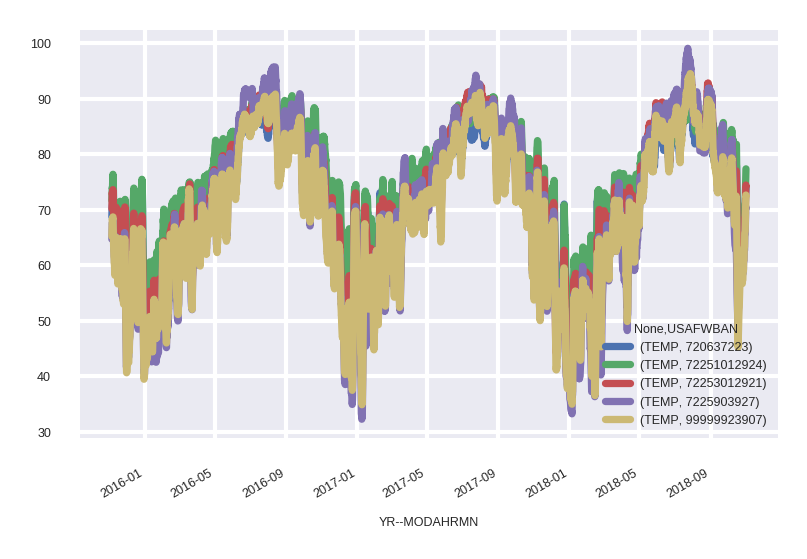

In [29]:
dftxtown.rolling(window=72).mean()[['TEMP']].plot();


The vapor pressure answers will be in units of millibars (mb) or hectoPascals (hPa).
To convert the saturated vapor pressure and/or the actual vapor pressure, the
temperature values must be converted to degrees Celsius (°C) .

## Deep learning approach

This part is based on the deep learning book "Deep Learning with Python" by Keras Lead François Chollet

https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.3-advanced-usage-of-recurrent-neural-networks.ipynb

In [30]:
import tensorflow as tf
print("tensorflow version = {}".format(tf.__version__))

import keras
print("keras version = {}".format(keras.__version__))


tensorflow version = 1.12.0
keras version = 2.2.4


## Transforming the data


The exact formulation of our problem will be the following: given data going as far back as `lookback` timesteps (a timestep is 10 minutes) 
and sampled every `steps` timesteps, can we predict the temperature in `delay` timesteps?

We will use the following parameter values:

* `lookback = 360`, i.e. our observations will go back 5 days.
* `steps = 3`, i.e. our observations will be sampled at one data point per hour.
* `delay = 72`, i.e. our targets will be 24 hours in the future.

To get started, we need to do two things:

* Preprocess the data to a format a neural network can ingest. This is easy: the data is already numerical, so we don't need to do any 
vectorization. However each timeseries in the data is on a different scale (e.g. temperature is typically between -20 and +30, but 
pressure, measured in mbar, is around 1000). So we will normalize each timeseries independently so that they all take small values on a 
similar scale.
* Write a Python generator that takes our current array of float data and yields batches of data from the recent past, alongside with a 
target temperature in the future. Since the samples in our dataset are highly redundant (e.g. sample `N` and sample `N + 1` will have most 
of their timesteps in common), it would be very wasteful to explicitly allocate every sample. Instead, we will generate the samples on the 
fly using the original data.

We preprocess the data by subtracting the mean of each timeseries and dividing by the standard deviation. We plan on using the first 
200,000 timesteps as training data, so we compute the mean and standard deviation only on this fraction of the data:

In [31]:
usedcols = 'DIR	TEMP	SPD	VSB	DEWP	ALT'.split('\t')
float_data = dftxtown[usedcols].dropna()
display(float_data.head(2))
float_data = float_data.values
float_data.shape

# 720637223 TEMP at index 4

DIR                                         TEMP  \
USAFWBAN            720637223 72251012924 72253012921 7225903927 720637223   
YR--MODAHRMN                                                                 
2015-11-01 00:00:00     330.0       335.0       205.0      330.0      70.0   
2015-11-01 01:00:00     340.0       340.0       335.0      330.0      69.0   

                                                                         SPD  \
USAFWBAN            72251012924 72253012921 7225903927 99999923907 720637223   
YR--MODAHRMN                                                                   
2015-11-01 00:00:00        73.5        75.0       61.5        65.0       6.0   
2015-11-01 01:00:00        72.0        69.0       61.0        63.0       6.0   

                                                                         VSB  \
USAFWBAN            72251012924 72253012921 7225903927 99999923907 720637223   
YR--MODAHRMN                                                                   
2015-11-01 00:00:00        15.5        10.0       12.0         6.0      10.0   
2015-11-01 01:00:00        14.0         9.5       10.0         5.0      10.0   

                                                            DEWP              \
USAFWBAN            72251012924 72253012921 7225903927 720637223 72251012924   
YR--MODAHRMN                                                                   
2015-11-01 00:00:00        10.0        10.0       10.0      68.0        65.0   
2015-11-01 01:00:00        10.0         4.5       10.0      68.0        68.0   

                                                 ALT                          \
USAFWBAN            72253012921 7225903927 720637223 72251012924 72253012921   
YR--MODAHRMN                                                                   
2015-11-01 00:00:00        61.5       55.5     29.80       29.82      29.880   
2015-11-01 01:00:00        63.0       55.0     29.83       29.85      29.905   

                                
USAFWBAN            7225903927  
YR--MODAHRMN                    
2015-11-01 00:00:00      29.87  
2015-11-01 01:00:00      29.90

(17417, 26)

In [0]:
mean = float_data.mean(axis=0)
float_data -= mean
std = float_data.std(axis=0)
float_data /= std

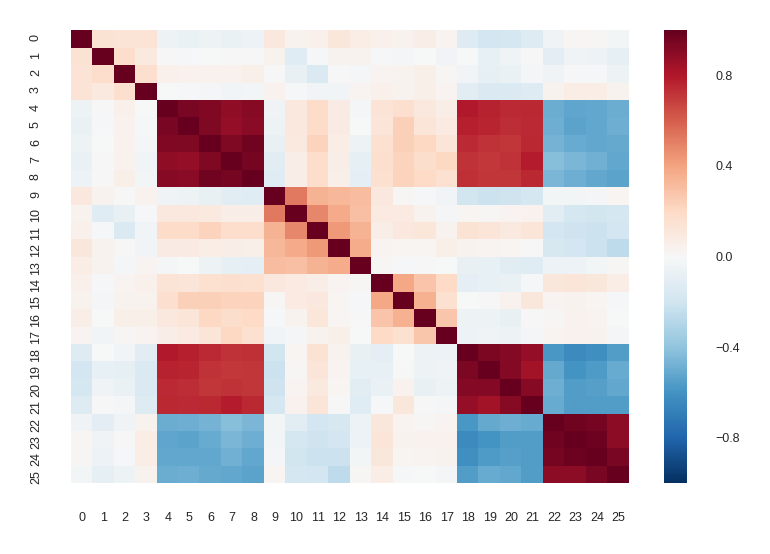

In [33]:
import seaborn as sns
#plt.matshow(pd.DataFrame(float_data, columns = usedcols).corr())

sns.heatmap(pd.DataFrame(float_data #, columns = usedcols
                        ).corr(),
            #xticklabels=usedcols,
            #yticklabels=usedcols
           )



Now here is the data generator that we will use. It yields a tuple `(samples, targets)` where `samples` is one batch of input data and 
`targets` is the corresponding array of target temperatures. It takes the following arguments:

* `data`: The original array of floating point data, which we just normalized in the code snippet above.
* `lookback`: How many timesteps back should our input data go.
* `delay`: How many timesteps in the future should our target be.
* `min_index` and `max_index`: Indices in the `data` array that delimit which timesteps to draw from. This is useful for keeping a segment 
of the data for validation and another one for testing.
* `shuffle`: Whether to shuffle our samples or draw them in chronological order.
* `batch_size`: The number of samples per batch.
* `step`: The period, in timesteps, at which we sample data. We will set it 6 in order to draw one data point every hour.

In [0]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6, target_col = 4):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while True:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][target_col]
        yield samples, targets

Now let's use our abstract generator function to instantiate three generators, one for training, one for validation and one for testing. Each will look at different temporal segments of the original data: the training generator looks at the first 200,000 timesteps, the validation generator looks at the following 100,000, and the test generator looks at the remainder.

In [35]:
float_data.shape

(17417, 26)

In [0]:
lookback = 120
step = 2
delay = 24
batch_size = 64
min_index_train = 0
max_index_train = 10000

min_index_valid = 10001
max_index_valid = 15000

def gen_train_val_test():
  train_gen = generator(float_data,
                        lookback=lookback,
                        delay=delay,
                        min_index=min_index_train,
                        max_index=max_index_train,
                        shuffle=True,
                        step=step, 
                        batch_size=batch_size,
                        )
  val_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=min_index_valid,
                      max_index=max_index_valid,
                      step=step,
                      batch_size=batch_size)
  test_gen = generator(float_data,
                       lookback=lookback,
                       delay=delay,
                       min_index=max_index_valid,
                       max_index=None,
                       step=step,
                       batch_size=batch_size)
  return train_gen, val_gen, test_gen

train_gen, val_gen, test_gen = gen_train_val_test()


# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (max_index_valid - min_index_valid - lookback) // batch_size

# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(float_data) - max_index_valid - lookback) // batch_size

## Using Recurrent Neural Networks

In [46]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

train_gen, val_gen, test_gen = gen_train_val_test()

model = Sequential()
#model.add(layers.GRU(16, implementation=2, 
#input_shape=(None, float_data.shape[-1])))
model.add(layers.CuDNNGRU(16, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=80,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
80/80 [==============================] - 2s 26ms/step - loss: 0.5922 - val_loss: 0.6375
Epoch 2/20
80/80 [==============================] - 2s 20ms/step - loss: 0.5104 - val_loss: 0.6275
Epoch 3/20
80/80 [==============================] - 2s 20ms/step - loss: 0.5025 - val_loss: 0.6144
Epoch 4/20
80/80 [==============================] - 2s 20ms/step - loss: 0.4821 - val_loss: 0.6178
Epoch 5/20
80/80 [==============================] - 2s 20ms/step - loss: 0.4826 - val_loss: 0.6109
Epoch 6/20
80/80 [==============================] - 2s 20ms/step - loss: 0.4596 - val_loss: 0.6060
Epoch 7/20
80/80 [==============================] - 2s 20ms/step - loss: 0.4594 - val_loss: 0.6049
Epoch 8/20
80/80 [==============================] - 2s 20ms/step - loss: 0.4569 - val_loss: 0.6054
Epoch 9/20
80/80 [==============================] - 2s 20ms/step - loss: 0.4423 - val_loss: 0.6053
Epoch 10/20
80/80 [==============================] - 2s 20ms/step - loss: 0.4455 - val_loss: 0.6020
Epoch 11/

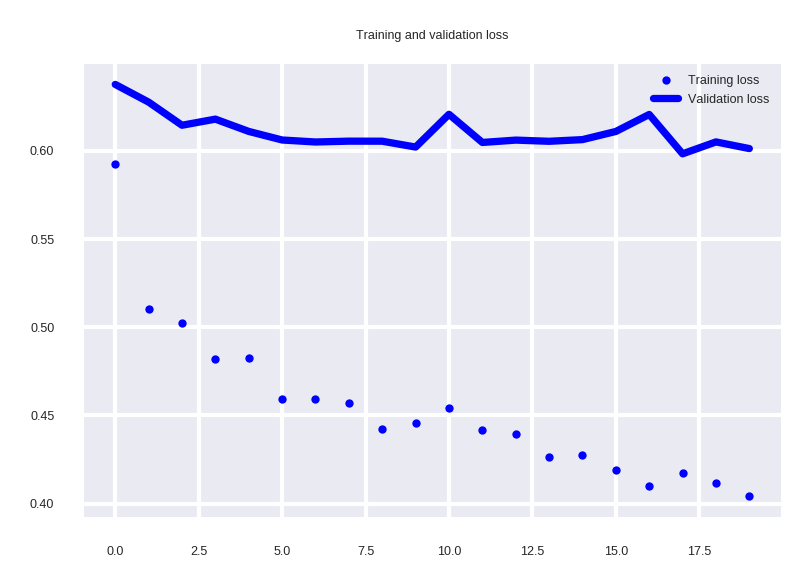

In [47]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [48]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

train_gen, val_gen, test_gen = gen_train_val_test()

model = Sequential()
model.add(layers.GRU(64,
                     #dropout=0.1,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=20,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps
                             )

Epoch 1/40
20/20 [==============================] - 6s 284ms/step - loss: 0.6371 - val_loss: 0.6260
Epoch 2/40
20/20 [==============================] - 5s 250ms/step - loss: 0.5394 - val_loss: 0.6149
Epoch 3/40
20/20 [==============================] - 5s 251ms/step - loss: 0.5198 - val_loss: 0.6113
Epoch 4/40
20/20 [==============================] - 5s 251ms/step - loss: 0.4908 - val_loss: 0.6027
Epoch 5/40
20/20 [==============================] - 5s 252ms/step - loss: 0.4836 - val_loss: 0.5992
Epoch 6/40
20/20 [==============================] - 5s 253ms/step - loss: 0.4994 - val_loss: 0.5950
Epoch 7/40
20/20 [==============================] - 5s 251ms/step - loss: 0.4732 - val_loss: 0.5982
Epoch 8/40
20/20 [==============================] - 5s 250ms/step - loss: 0.4837 - val_loss: 0.5894
Epoch 9/40
20/20 [==============================] - 5s 252ms/step - loss: 0.4661 - val_loss: 0.5924
Epoch 10/40
20/20 [==============================] - 5s 256ms/step - loss: 0.4549 - val_loss: 0.5918

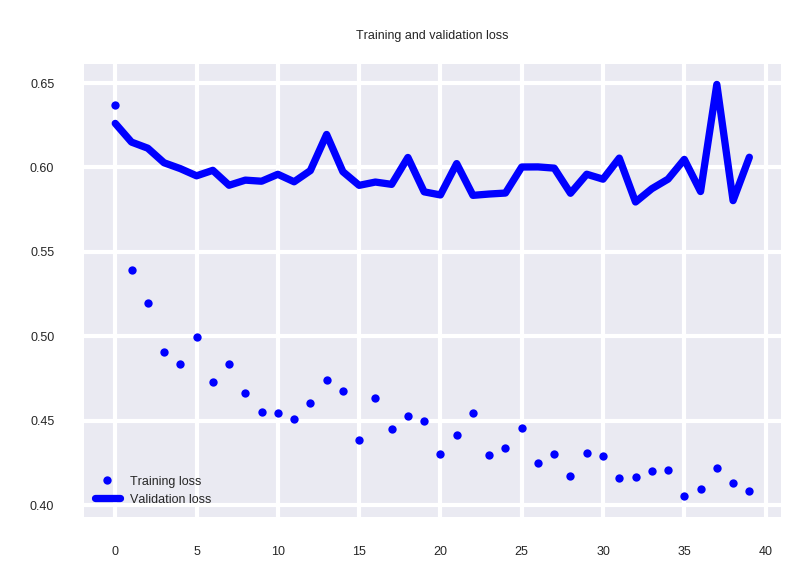

In [49]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 64)                17472     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 17,537
Trainable params: 17,537
Non-trainable params: 0
_________________________________________________________________


0.6463597669239203


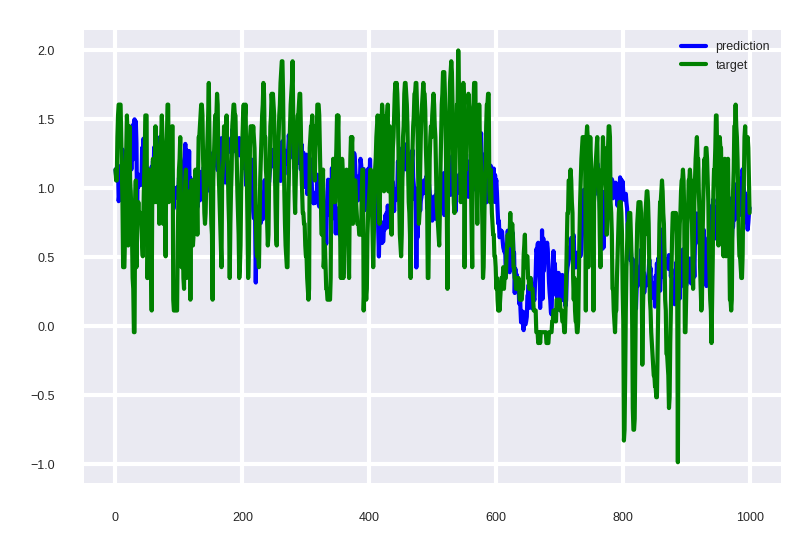

In [51]:
train_gen, val_gen, test_gen = gen_train_val_test()

batch_maes = []
predsi = []
targetsi = []
for step in range(val_steps):
    samples, targets = next(val_gen)
    preds = model.predict(samples)
    mae = np.mean(np.abs(preds - targets))
    #print(mae)
    batch_maes.append(mae)
    predsi.extend(preds)
    targetsi.extend(targets)
print(np.mean(batch_maes))
plt.plot(predsi[:1000], 'b', linewidth=1, label='prediction');
plt.plot(targetsi[:1000], 'g', linewidth=1, label='target');
plt.legend();